<a href="https://colab.research.google.com/github/daeber1166/proyectoMoA/blob/main/ProyectoMoA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn  as sns
import matplotlib.pyplot as plt
import math



# <a id='1'>1. importacion de datos</a>

In [87]:
url='https://raw.githubusercontent.com/daeber1166/proyectoMoA/main/sample_submission.csv'
url2='https://raw.githubusercontent.com/daeber1166/proyectoMoA/main/test_features.csv'
url3='https://raw.githubusercontent.com/daeber1166/proyectoMoA/main/train_drug.csv'
#url4=''
url5='https://raw.githubusercontent.com/daeber1166/proyectoMoA/main/train_targets_nonscored.csv'
url6='https://raw.githubusercontent.com/daeber1166/proyectoMoA/main/train_targets_scored.csv'

In [88]:
 
files.upload()

Saving train_features.csv to train_features (2).csv


In [89]:
sample_df = pd.read_csv(url)
test_features_df=pd.read_csv(url2)
train_drug_df=pd.read_csv(url3)
train_nonscored_df=pd.read_csv(url5)
train_features_df = pd.read_csv('train_features.csv')
train_targets_score_df=pd.read_csv(url6)

In [ ]:
train_features_df.shape

(23814, 876)

In [90]:
test_features_df.shape

(3982, 876)

In [ ]:
train_targets_score_df.shape

(23814, 207)

In [91]:
train_targets_score_df.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
train_targets_score_df.shape

(23814, 207)

In [93]:

train_features_df.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [94]:
sample_df.head()



,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,id_001897cda,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,id_002429b5b,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,id_00276f245,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,id_0027f1083,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [95]:
train_nonscored_df.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,aldehyde_dehydrogenase_activator,aldose_reductase_inhibitor,alpha_mannosidase_inhibitor,ampk_inhibitor,androgen_biosynthesis_inhibitor,angiotensin_receptor_agonist,antacid,anthelmintic,antihypertensive,antimetabolite,antipruritic,antirheumatic_drug,antiseptic,antispasmodic,antithyroid_agent,antitussive,anxiolytic,ap_inhibitor,apolipoprotein_expression_enhancer,apoptosis_inhibitor,arf_inhibitor,aryl_hydrocarbon_receptor_agonist,aryl_hydrocarbon_receptor_antagonist,aspartic_protease_inhibitor,atherogenesis_inhibitor,atherosclerosis_formation_inhibitor,atp-sensitive_potassium_channel_agonist,atp-sensitive_potassium_channel_inhibitor,atp_channel_activator,atp_channel_blocker,...,thromboxane_synthase_inhibitor,thyroid_hormone_inhibitor,thyroid_hormone_stimulant,thyrotropin_releasing_hormone_receptor_agonist,tie_inhibitor,tissue_transglutaminase_inhibitor,topical_anesthetic,topical_sunscreen_agent,trace_amine_associated_receptor_agonist,trace_amine_associated_receptor_antagonist,trail_modulator,transient_receptor_potential_channel_agonist,triacylglycerol_lipase_inhibitor,tricyclic_antidepressant,tryptophan_hydroxylase_inhibitor,tyrosinase_inhibitor,tyrosine_hydroxylase_inhibitor,tyrosine_phosphatase_inhibitor,ubiquitin-conjugating_enzyme_inhibitor,ubiquitin_ligase_inhibitor,urease_inhibitor,uric_acid_diuretic,uricase_inhibitor,uricosuric,urotensin_receptor_agonist,urotensin_receptor_antagonist,vasoconstrictor,vasodilator,vasopressin_receptor_agonist,vasopressin_receptor_antagonist,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# <a id='1'>2. Analisis y preparacion de datos</a>

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
nuevodf=train_features_df[['cp_type','cp_time','cp_dose']]#cree unnuevo dataframe
cat=pd.get_dummies(nuevodf,columns=['cp_dose','cp_type'],drop_first=True)#categorice las variables
cat

,cp_time,cp_dose_D2,cp_type_trt_cp
0,24,0,1
1,72,0,1
2,48,0,1
3,48,0,1
4,72,1,1
...,...,...,...
23809,24,1,1
23810,24,1,1
23811,48,1,0
23812,24,0,1


In [ ]:
#ns.set(style='ticks',color_codes=True)
#g=sns.pairplot(cat,palette='spectral')
#nuevodf.mean().plot(figsize=(8,5),kind='pie')
#plt.title('DISTRIBUCION DE ALGUNAS VARIABLES')

In [97]:
train_features_df.groupby('cp_type').size()#en que clase  esta dividido

cp_type
ctl_vehicle     1866
trt_cp         21948
dtype: int64

Text(0.5, 1.0, 'division datos de cp-type')

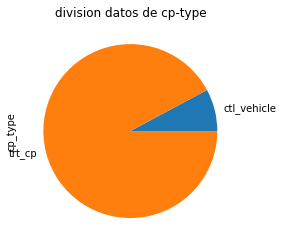

In [98]:
#train_features_df.groupby('cp_type')['cp_type'].count().plot(kind='bar')
train_features_df.groupby('cp_type')['cp_type'].count().plot(kind='pie')
plt.title('division datos de cp-type')


cp_dose
D1    12147
D2    11667
dtype: int64


Text(0.5, 1.0, 'division datos de la dosis ')

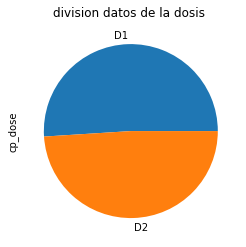

In [99]:
print(train_features_df.groupby('cp_dose').size())
train_features_df.groupby('cp_dose')['cp_dose'].count().plot(kind='pie')
plt.title('division datos de la dosis ')

cp_time
24    7772
48    8250
72    7792
dtype: int64


Text(0.5, 1.0, 'distribucion segun duracion dosis ')

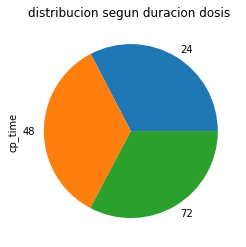

In [100]:
print(train_features_df.groupby('cp_time').size())
train_features_df.groupby('cp_time')['cp_time'].count().plot(kind='pie')
plt.title('distribucion segun duracion dosis ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'GRAFICOS DE ENTRENAMIENTO Y TESTEO')

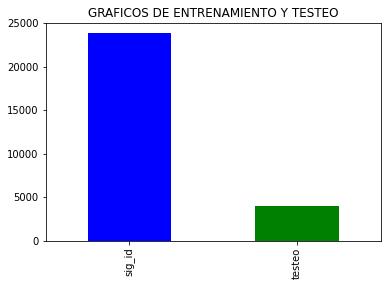

In [101]:
train_test=train_features_df[['sig_id']]
testeo=[]
testeo=test_features_df['sig_id']
train_test['testeo']=testeo
train_test.count().plot(kind='bar',color=['b','g'])
plt.title('GRAFICOS DE ENTRENAMIENTO Y TESTEO')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'GRAFICOS DE ENTRENAMIENTO Y TESTEO y TARGET')

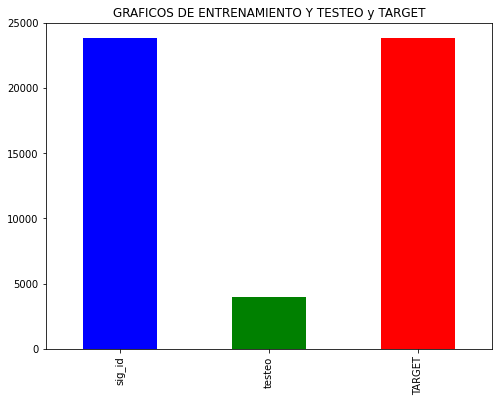

In [102]:
target=[]
target=train_targets_score_df['sig_id']
train_test['TARGET']=target
train_test.count().plot(figsize=(8,6),kind='bar',color=['b','g','r'])
plt.title('GRAFICOS DE ENTRENAMIENTO Y TESTEO y TARGET')

In [ ]:

#sample_df.mean().plot(figsize=(35,8),kind='bar')

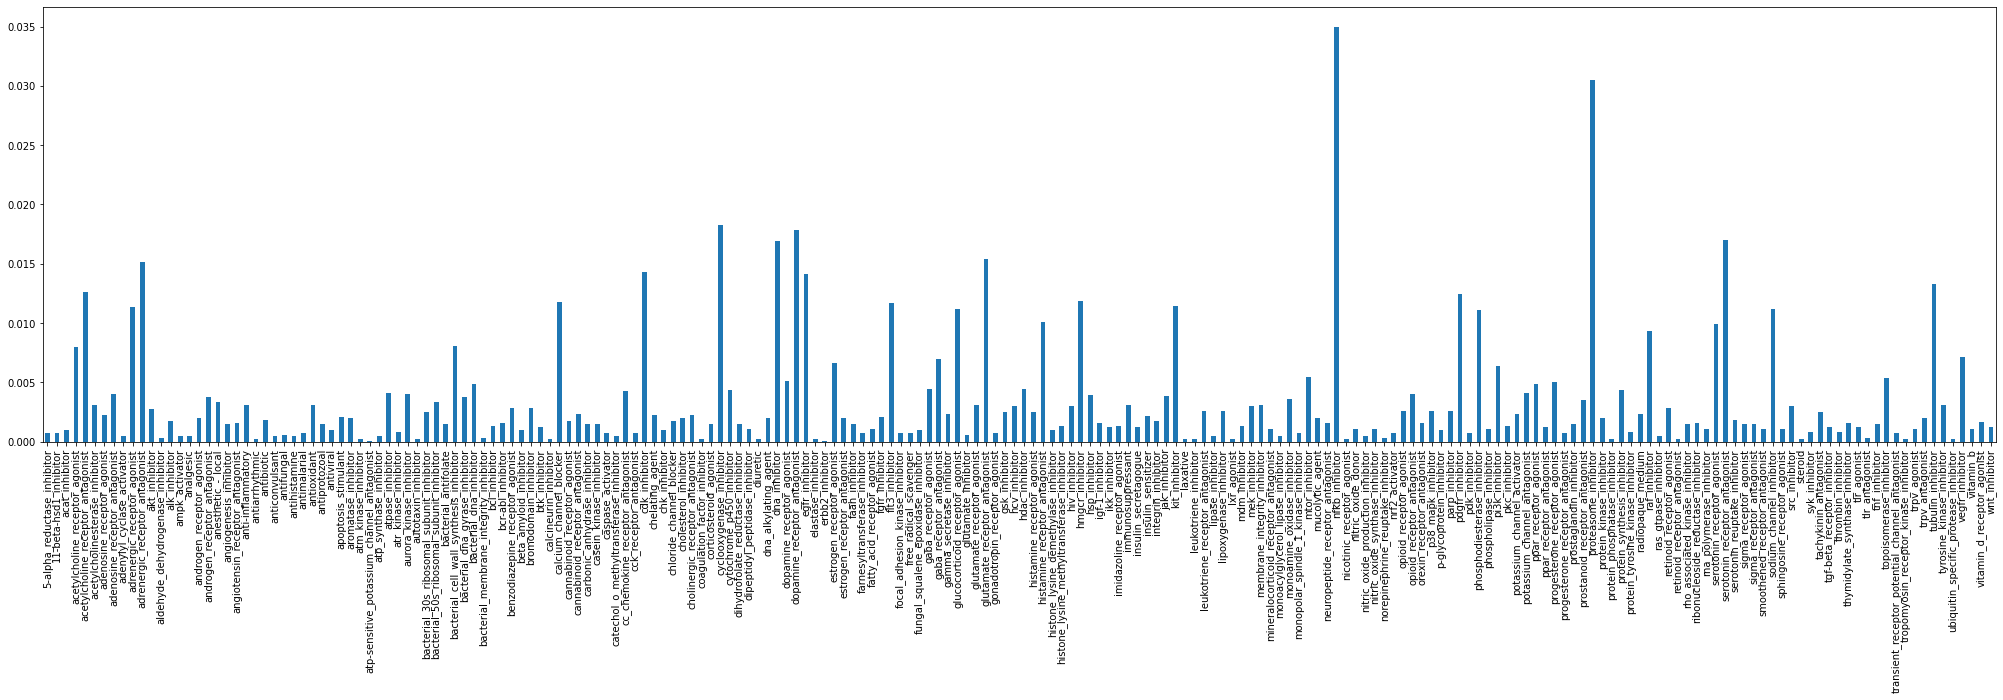

In [123]:
train_targets_score_df.mean(axis=0, skipna=True).plot(figsize=(35,8),kind='bar')

In [104]:
#for i in range(1):
 # recorte_c=train_features_df.drop(train_features_df.columns[[1,i]], axis='columns')
# recorte_g,recorte_c=train_features_df[100:],train_features_df[:776]
recorte1=train_features_df.drop(train_features_df.columns[[1,2,3]], axis='columns')
#recorte1.shape


col = list(recorte1.columns)
#Filtro 2: Columnas que empiezan por una g
filtro2 = [col for col in recorte1 if col.startswith('g')]
#Eliminar
df2_drop = recorte1.drop(columns=filtro2)
#Seleccionar
df2_keep = recorte1[filtro2]
df2_drop.shape

(23814, 101)

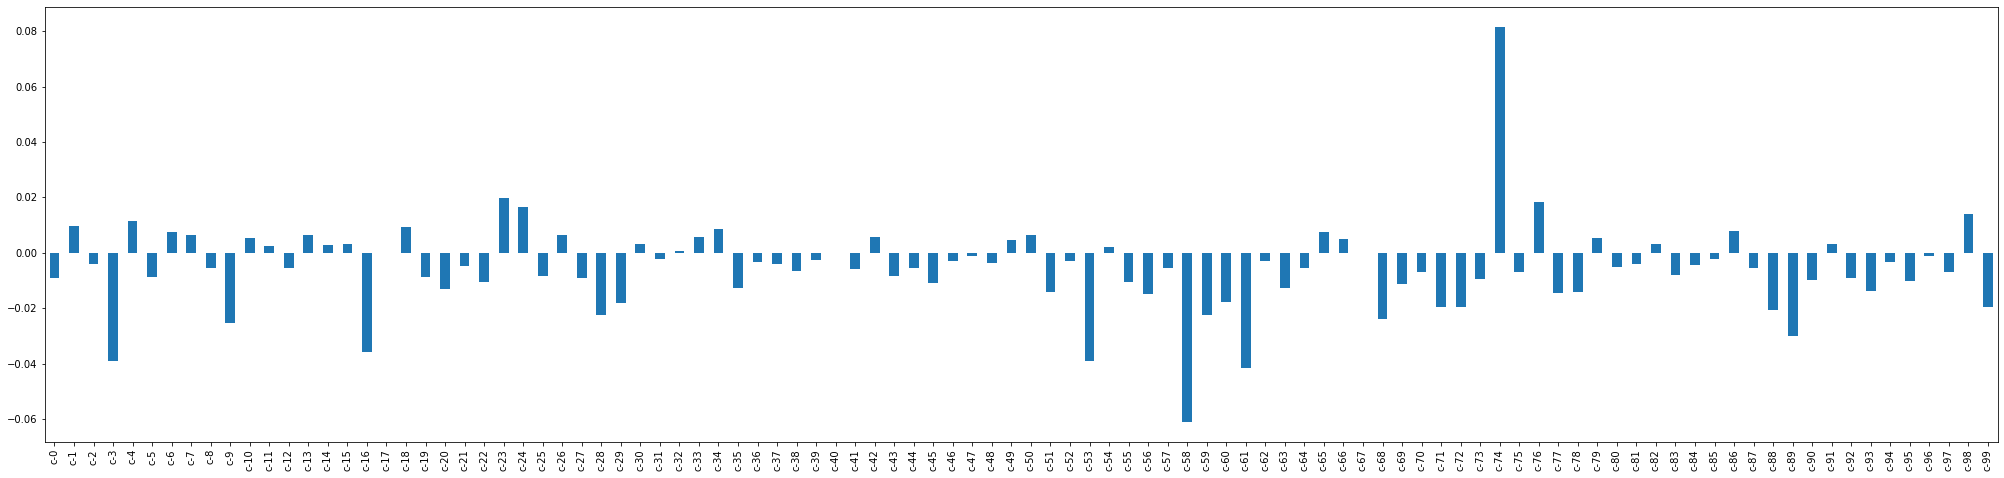

In [105]:
df2_drop.median().plot(figsize=(35,8),kind='bar')

In [106]:

col2 = list(recorte1.columns)
#Filtro 2: Columnas que empiezan por una g
filtro22 = [col2 for col2 in recorte1 if col2.startswith('c')]
#Eliminar
df2_drop2 = recorte1.drop(columns=filtro22)
#Seleccionar
df2_keep2 = recorte1[filtro22]
df2_drop2.shape

(23814, 773)

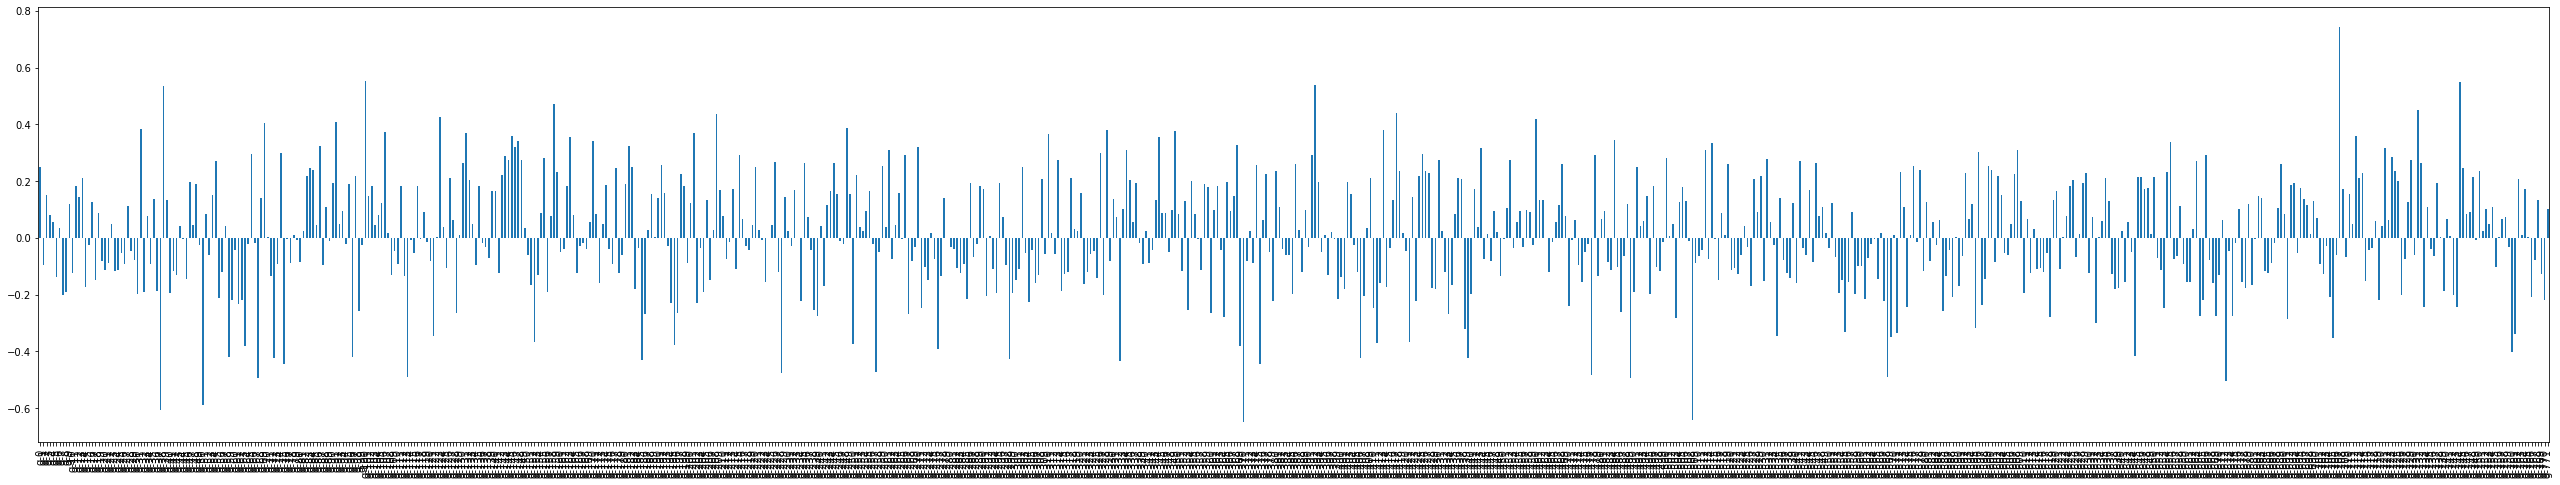

In [107]:
df2_drop2.mean().plot(figsize=(45,8),kind='bar')

# <a id='1'>3. correlaciones</a>

In [108]:

data=pd.merge(train_features_df,train_targets_score_df,on='sig_id')#unir los dataframes 
data_c=pd.merge(df2_drop,train_targets_score_df,on='sig_id')
#data_c.head()



In [109]:
cat
#train_features_df_corr=train_features_df.corr(method='spearman')
eliminado_df=train_features_df.drop(['cp_type','cp_time','cp_dose'], axis=1)
eliminado_df.head()
#agregar las columnas categorizadas a un nuevo dataframe donde esta el train_features_df
dosis=[]
dosis=cat['cp_dose_D2']
eliminado_df['Dosis']=dosis
eliminado_df
tiempo=[]
tiempo=cat['cp_time']
eliminado_df['tiempo duracion']=tiempo
tipo=[]
tipo=cat['cp_type_trt_cp']
eliminado_df['type']=tipo
#eliminado_df.head()

In [110]:
#eliminado_df_corr=eliminado_df.corr(method='spearman')
data_c_corr=data_c.corr(method='spearman')
data_c_corr

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
c-0,1.000000,0.385407,0.388794,0.266189,0.409580,0.359842,0.385532,0.344488,0.351549,0.268181,0.411460,0.380171,0.345198,0.433352,0.338235,0.384575,0.241743,0.359392,0.410138,0.300791,0.315905,0.352778,0.347841,0.343201,0.366663,0.366259,0.427573,0.370187,0.351627,0.311413,0.329596,0.431447,0.357381,0.413313,0.403058,0.355656,0.398679,0.341838,0.413111,0.345180,...,-0.022448,-0.000584,-0.000009,-0.056680,-0.001025,0.002612,-0.005566,0.015703,-0.001948,-0.000699,0.006360,0.010645,0.004798,0.009384,0.001136,0.005853,0.008513,0.000307,-0.003826,0.004303,-0.012263,0.007844,0.008432,-0.002573,0.006150,0.014899,-0.007592,0.003990,-0.054005,0.006177,-0.003319,-0.014490,-0.004802,-0.076369,0.000092,-0.016914,-0.003394,0.000172,0.007617,0.009714
c-1,0.385407,1.000000,0.478378,0.305385,0.458568,0.419245,0.442482,0.400358,0.424834,0.324994,0.484894,0.450922,0.397720,0.503721,0.395893,0.453365,0.275415,0.399004,0.453598,0.351299,0.364773,0.384685,0.429097,0.414066,0.430766,0.418548,0.494545,0.410861,0.380502,0.334704,0.364233,0.474530,0.428697,0.475102,0.477432,0.395436,0.463742,0.383726,0.493606,0.371304,...,-0.024839,-0.009154,0.015480,-0.090119,0.001952,-0.003036,-0.012423,0.001426,-0.022067,-0.003023,0.000813,0.007244,0.006666,0.003677,-0.003752,0.002656,0.011495,-0.000098,-0.010527,0.005496,-0.022344,0.006927,-0.000863,0.008028,-0.006822,0.006632,0.004450,0.013722,-0.081809,0.002847,0.001213,-0.010772,0.002525,-0.139095,0.006591,-0.006239,-0.012208,-0.000590,-0.005027,0.008591
c-2,0.388794,0.478378,1.000000,0.328659,0.493640,0.422591,0.478618,0.423300,0.433113,0.322774,0.508151,0.480891,0.416980,0.565026,0.391499,0.473159,0.293057,0.449834,0.487815,0.359882,0.360925,0.418762,0.418647,0.392918,0.447365,0.432499,0.529241,0.444116,0.403461,0.365231,0.420194,0.473832,0.425533,0.506553,0.492580,0.386105,0.475443,0.399546,0.516884,0.375127,...,-0.020264,-0.001303,0.003586,-0.069414,0.000914,-0.003013,-0.000957,-0.003771,-0.014449,-0.003371,0.013275,0.013896,0.007880,0.006729,0.004517,0.005059,0.005882,-0.000837,-0.029842,0.001256,-0.009779,-0.000871,0.008789,-0.000870,0.004003,0.011054,0.000545,0.013469,-0.083183,0.004081,-0.007791,-0.006484,0.005191,-0.131200,-0.011237,-0.003350,-0.021260,0.009525,0.001294,0.003600
c-3,0.266189,0.305385,0.328659,1.000000,0.347389,0.311046,0.344343,0.280967,0.313208,0.269821,0.342646,0.319525,0.304347,0.357214,0.295920,0.330516,0.217195,0.308988,0.348390,0.275132,0.267455,0.312397,0.305544,0.329238,0.310230,0.347035,0.371240,0.319184,0.314196,0.280124,0.306477,0.373044,0.327204,0.346115,0.336932,0.329677,0.326404,0.300528,0.355381,0.325265,...,-0.023421,-0.000704,0.011463,0.049826,0.013145,-0.002515,-0.004219,-0.003424,-0.007988,-0.007339,0.015553,0.020290,0.011888,0.019482,0.001450,0.002471,0.006311,0.020421,-0.015867,-0.001687,-0.012965,0.004825,-0.000978,-0.002536,-0.001220,-0.000661

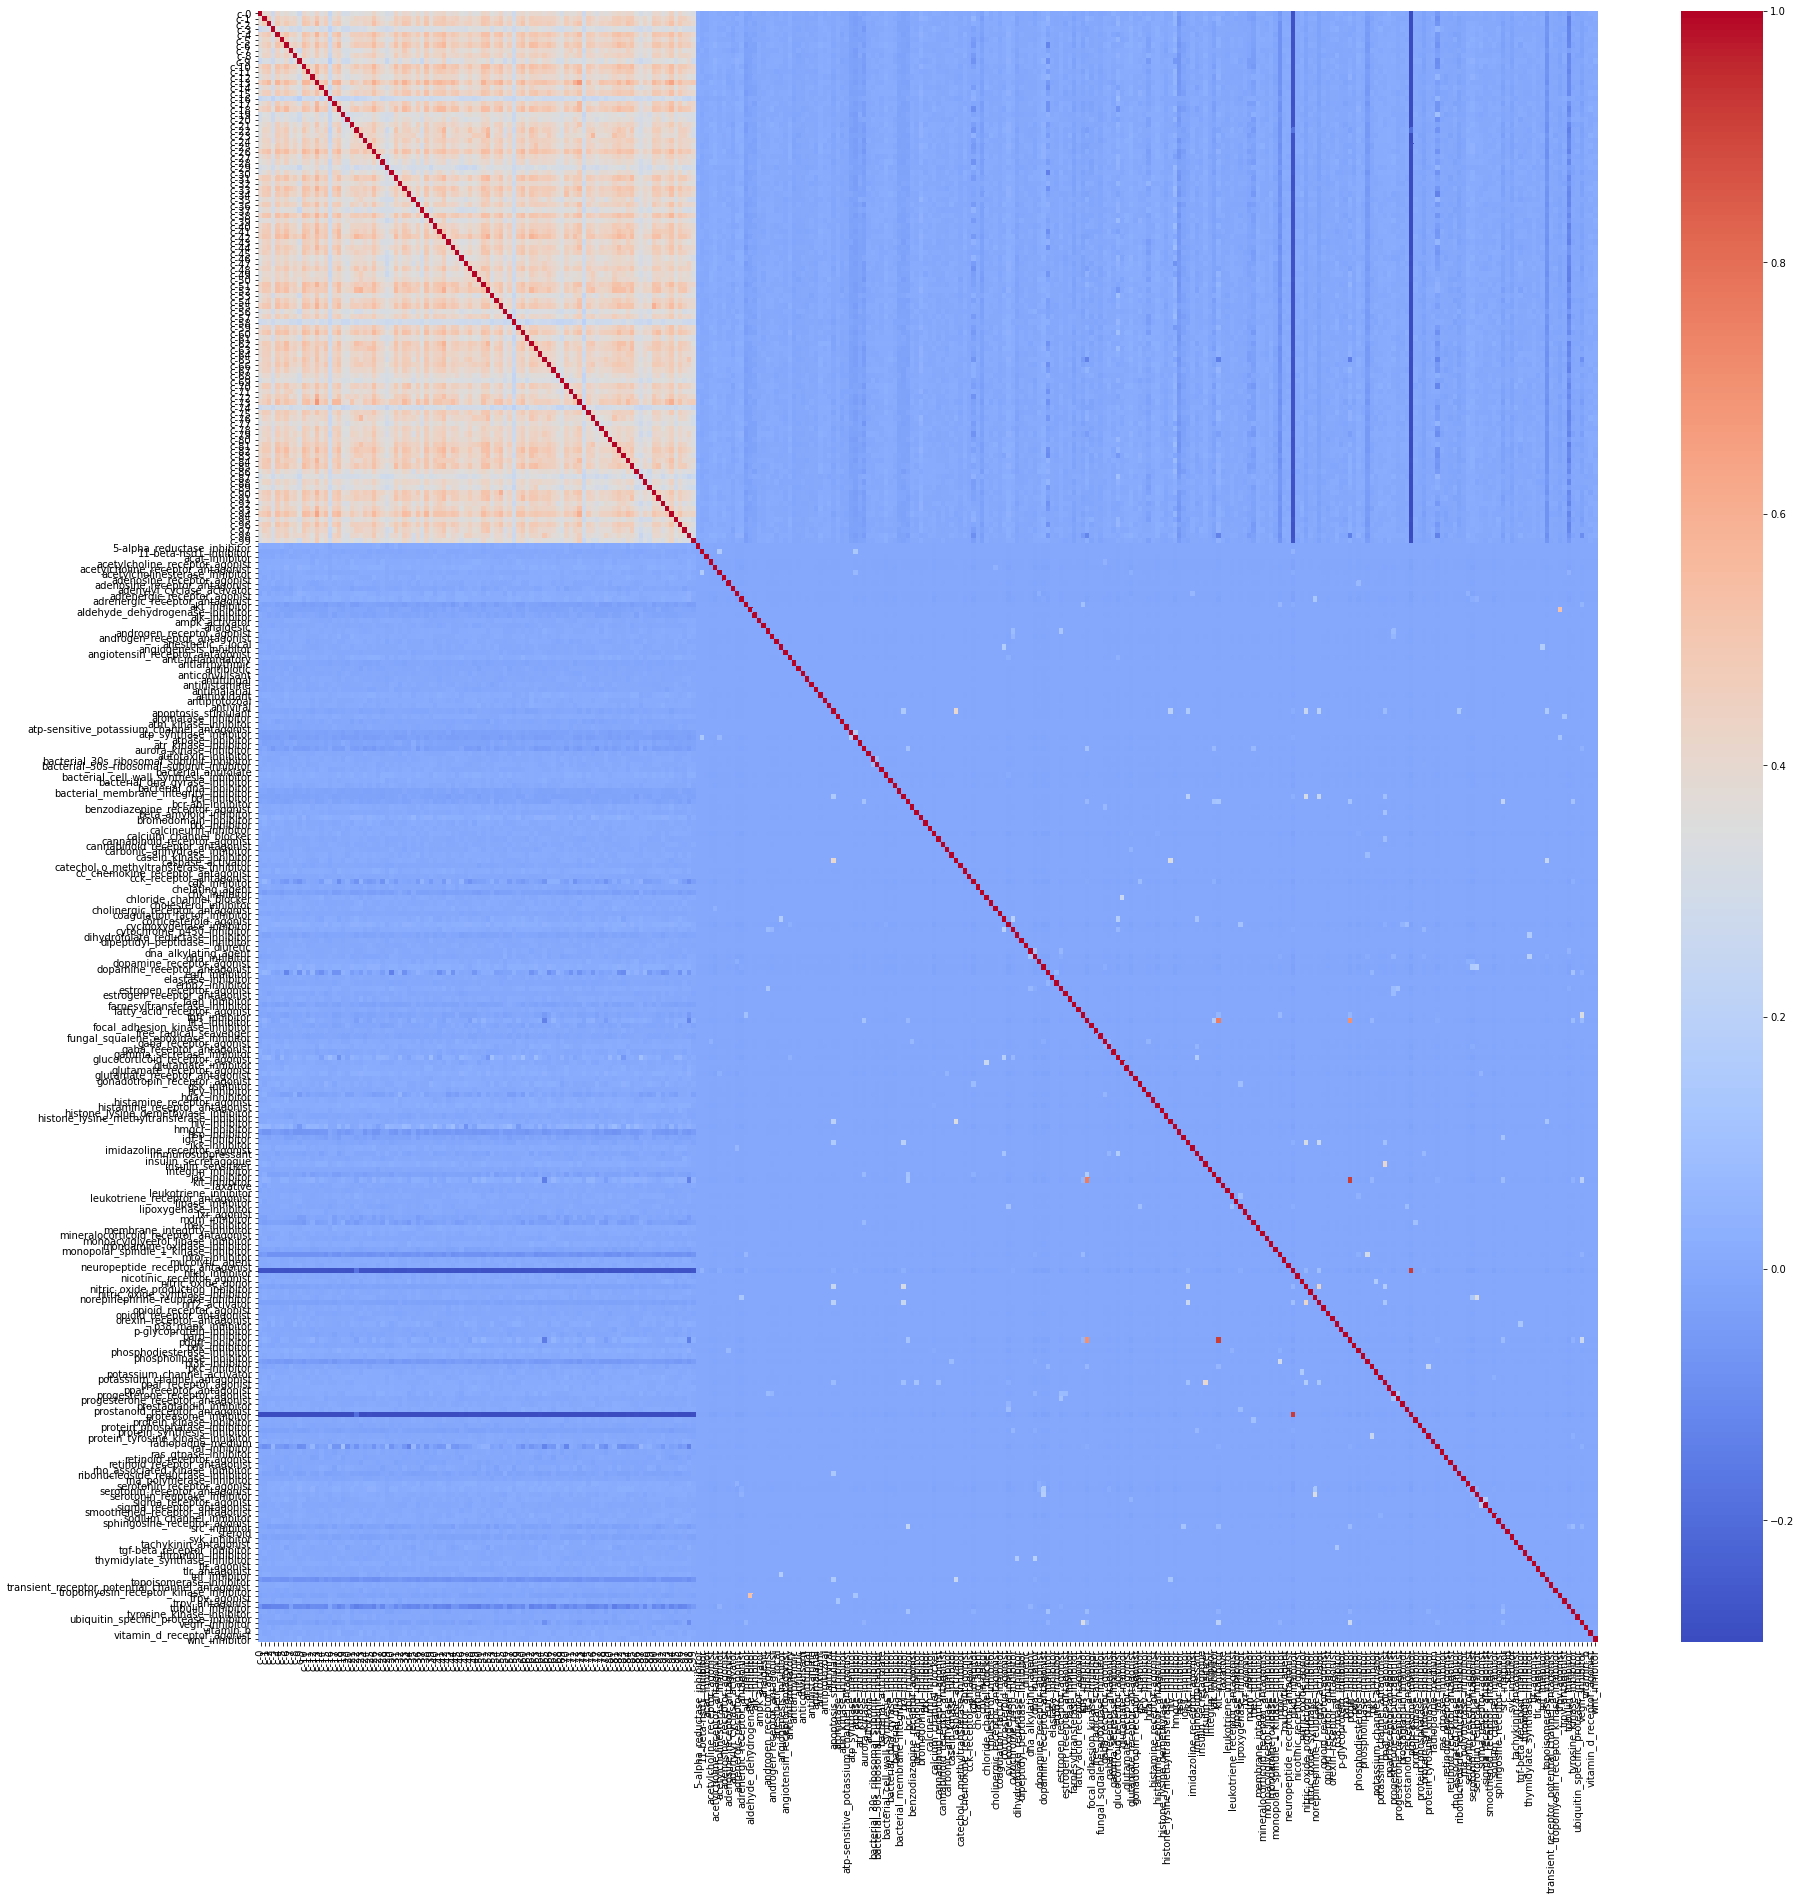

In [111]:
plt.figure(figsize=(30,30))
sns.heatmap(data_c_corr,
            xticklabels=data_c_corr.columns,
            yticklabels=data_c_corr.columns,
            cmap='coolwarm'
            ) 


# <a id='1'>4.modelos </a>

In [129]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    eliminado_df, train_targets_score_df, test_size=0.33, random_state=42)

In [ ]:

#y_test=test.drop(['sig_id'],axis=1)



(16669, 206)

In [130]:
X_train=X_train.drop(['sig_id'],axis=1)
y_train=y_train.drop(['sig_id'],axis=1)



In [124]:
y_test.shape

(7145, 206)

In [114]:
X_train.dtypes

g-0                float64
g-1                float64
g-2                float64
g-3                float64
g-4                float64
                    ...   
c-98               float64
c-99               float64
Dosis                uint8
tiempo duracion      int64
type                 uint8
Length: 875, dtype: object

In [115]:
x_train=x_train.astype(np.int64)#cambiar a un solo tipo de dato
y_train=y_train.astype(np.int64)

In [116]:
ceros=y_train[y_train==0].count()
unos=y_train[y_train==1].count()
unos.shape

(206,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
model=DecisionTreeClassifier(random_state=1)

In [118]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
test_features_df.head()
cat_test=pd.get_dummies(test_features_df,columns=['cp_dose','cp_type'],drop_first=True)#categorice las variables
x_test=cat_test.drop(['sig_id'],axis=1)



In [ ]:
train_targets_score_df.shape

(23814, 207)

In [ ]:
y_predit=model.predict(x_test)

In [ ]:
from  sklearn.metrics import accuracy_score
acc=accuracy_score(y_train,y_predit)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predit)

ValueError: ignored

In [ ]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train, y_train)

ValueError: ignored

In [ ]:
#from sklearn.model_selection import cross_val_score
#cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

In [ ]:
#from sklearn.linear_selection import cross_val_predict
#y_train_pred=cross_val_predict(modelo,x_train ,y_train,cv=3)

In [ ]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(x_train ,y_train_pred)

In [ ]:
#from sklearn.svm import SVC




#SVM Classifier model
#svm_clf = SVC(kernel="linear", C=float("inf"))
#svm_clf.fit(X, y)